In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

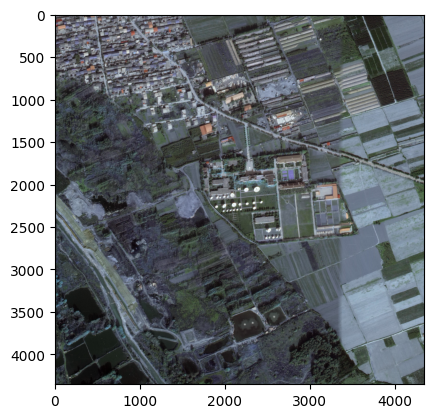

In [59]:
path = 'C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
img = cv2.imread(path)
# cv2.imshow(img, 'nothing')
plt.figure()
plt.imshow(img)
plt.show()

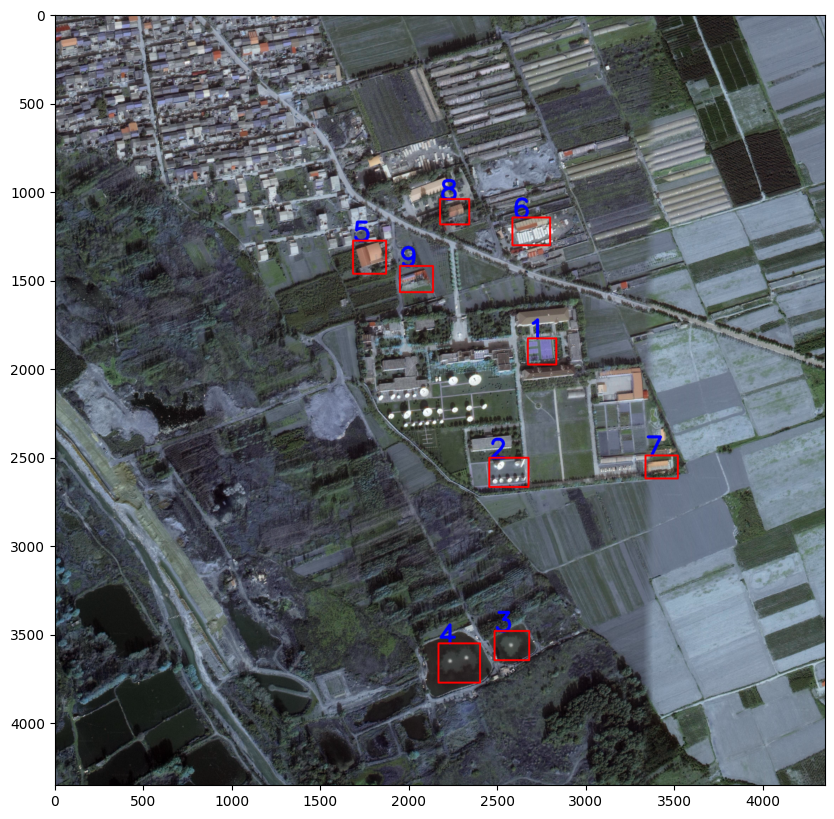

In [4]:
# Các đối tượng quan tâm
points = {'1':[2672, 1827, 161, 148],
         '2': [2454, 2502, 222, 165],
         '3':[2484, 3481, 196, 165],
         '4':[2167, 3551, 235, 222],
         '5':[1684, 1275, 187, 187],
         '6': [2585, 1144, 213, 157],
         '7':[3337, 2489, 183, 130],
         '8':[2176, 1040, 165, 143],
         '9':[1949, 1418, 187, 148]
         }
imgCopy = img.copy()
for key in points.keys():
    start_point = (points[key][0], points[key][1])
    end_point = (points[key][0] + points[key][2], points[key][1] + points[key][3])
    cv2.putText(imgCopy, key, start_point, cv2.FONT_HERSHEY_SIMPLEX, 5, (0,0,255), 15, cv2.LINE_AA)
    cv2.rectangle(imgCopy, start_point, end_point, (255,0,0), 10)
plt.figure(figsize=(10,10))
plt.imshow(imgCopy)
plt.show()

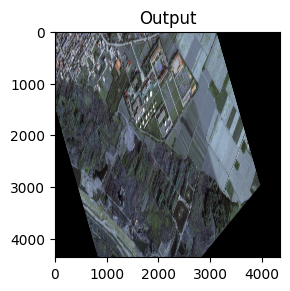

True

In [14]:
# warpAffine
import cv2
import numpy as np
from matplotlib import pyplot as plt
rows, cols, ch = img.shape
 
pts1 = np.float32([[500, 500],
                   [2000, 3000], 
                   [500, 2000]])
 
pts2 = np.float32([[100, 400],
                   [2000, 2800], 
                   [700, 2500]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(dst)
plt.title('Output')
plt.show()

cv2.imwrite('warpAffine.jpg', dst)

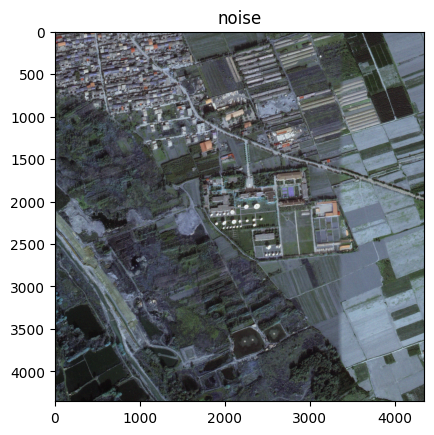

In [86]:
import cv2
import numpy as np

def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)
# Thêm Gaussian Noise
noisy_image = add_gaussian_noise(img)

plt.imshow(noisy_image)
plt.title('noise')
plt.show()

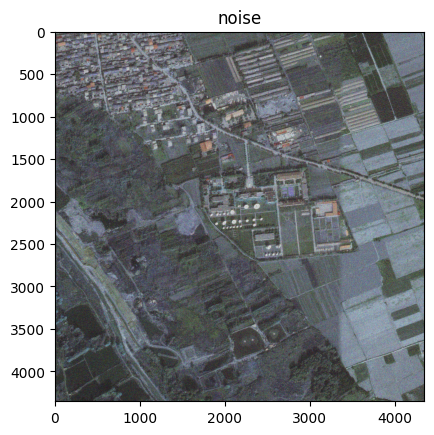

In [20]:
noisy_image = add_gaussian_noise(img, 0, 100)

plt.imshow(noisy_image)
plt.title('noise')
plt.show()

In [87]:
# rotate image
import cv2 

  
# Extracting height and width from  
# image shape 
noisy_image = add_gaussian_noise(img, 0, 100)
new = noisy_image[2500: 4352, 1500:3352]
clone = new.copy()
height, width = new.shape[:2] 
  
# get the center coordinates of the 
# image to create the 2D rotation 
# matrix 
center = (width/2, height/2) 
  
# using cv2.getRotationMatrix2D()  
# to get the rotation matrix 
point1 =(2158 - 1500, 3538-2500)
point2 =(2401 - 1500, 3773 - 2500)
def rotate_point(point, matrix):
    np_point = np.array([[point[0], point[1]]], dtype=np.float32)   
    transformed_point = cv2.transform(np_point.reshape(1, -1, 2), matrix)
    return tuple(transformed_point.astype(np.int32)[0][0])
def rotate_rectangle(point1, point2, matrix):
    point3 = (point1[0], point2[1])
    point4 = (point2[0], point1[1])
    transformed_point1 = rotate_point(point1, matrix)
    transformed_point2 = rotate_point(point2, matrix)
    transformed_point3 = rotate_point(point3, matrix)
    transformed_point4 = rotate_point(point4, matrix)
    x0 = min(transformed_point1[0],transformed_point2[0],transformed_point3[0],transformed_point4[0]) 
    x1 = max(transformed_point1[0],transformed_point2[0],transformed_point3[0],transformed_point4[0])    
    y0 = min(transformed_point1[1],transformed_point2[1],transformed_point3[1],transformed_point4[1]) 
    y1 = max(transformed_point1[1],transformed_point2[1],transformed_point3[1],transformed_point4[1]) 
    return [(x0, y0), (x1, y1)]  
def rotate_dataset(image, p_center, p1, p2, folder):
    
    for angle in range(0, 180, 2):
        rotate_matrix = cv2.getRotationMatrix2D(center=p_center, angle=angle, scale=1) 
        
        # rotate the image using cv2.warpAffine  
        rotated_image = cv2.warpAffine( src=image, M=rotate_matrix, dsize=(width, height)) 
        transform_rec  = rotate_rectangle(p1, p2, rotate_matrix)
    
        rotated_image = cv2.rectangle(rotated_image, transform_rec[0],transform_rec[1], (0, 255,0), 2)
        cv2.imwrite(f'{folder}/{angle}.jpg',rotated_image )
    print(transform_rec)
    

In [88]:
rotate_dataset(clone, center, point1, point2)

[(954, 580), (1205, 823)]
